In [21]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [8]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

In [9]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1),).type(torch.LongTensor)

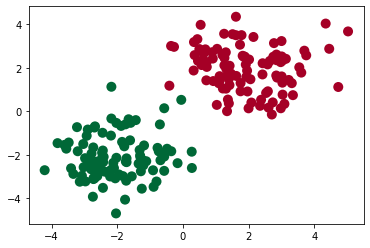

In [11]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:,1], c=y.data.numpy(), s=100, lw=0, cmap="RdYlGn")
plt.show()

In [16]:
class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [26]:
net = Net(2, 10, 2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [27]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

In [28]:
plt.ion()
plt.show()

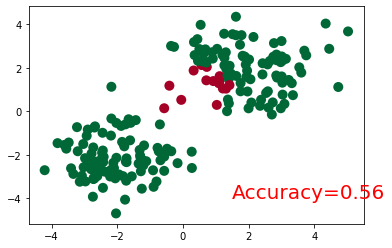

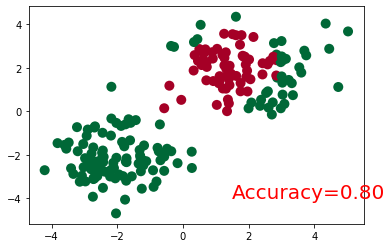

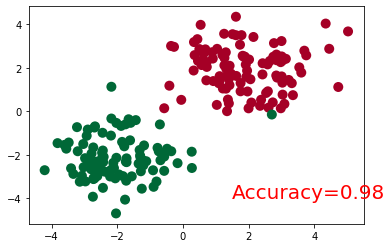

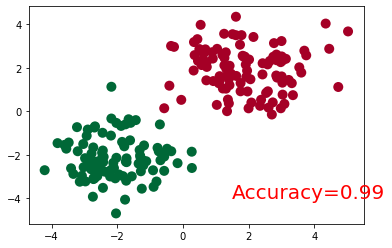

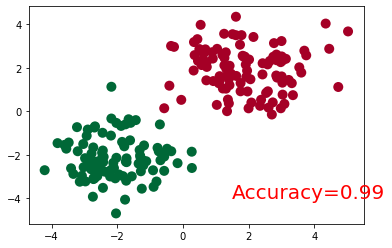

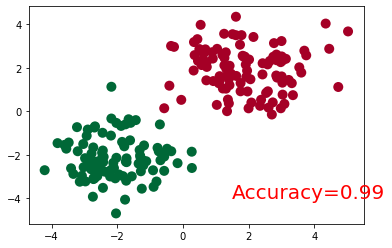

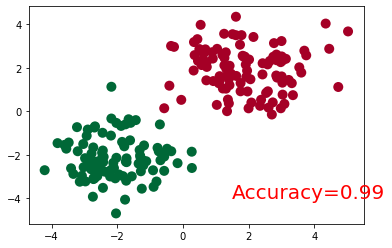

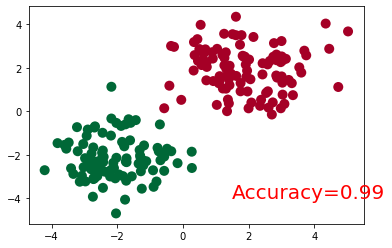

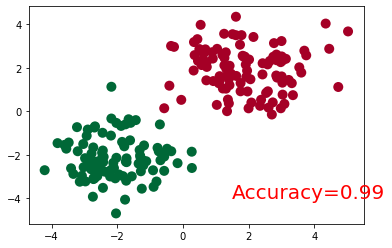

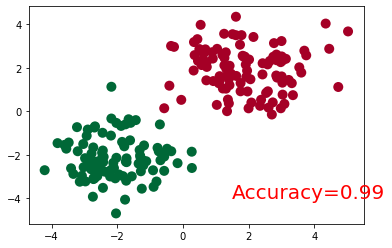

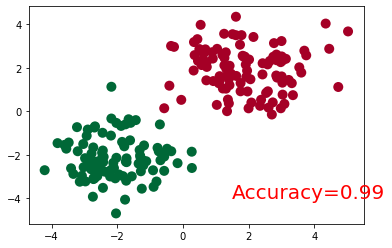

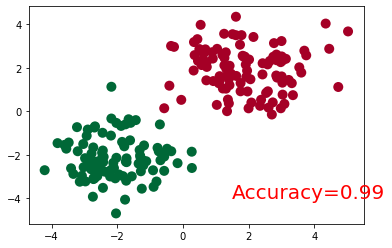

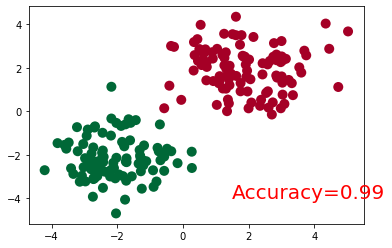

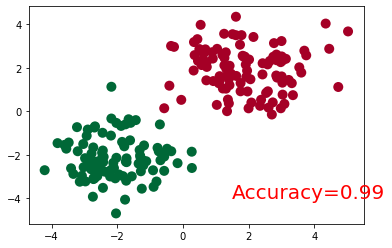

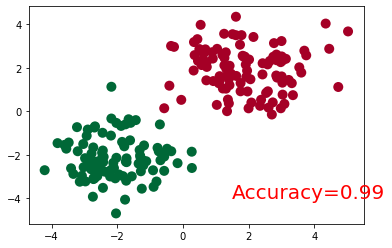

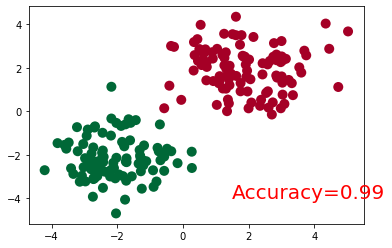

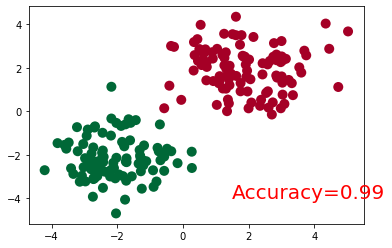

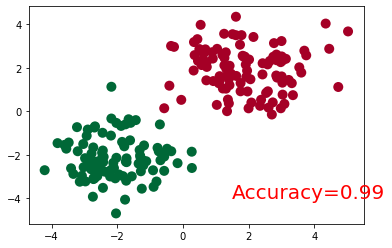

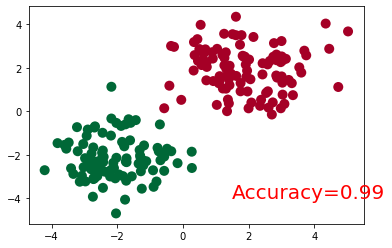

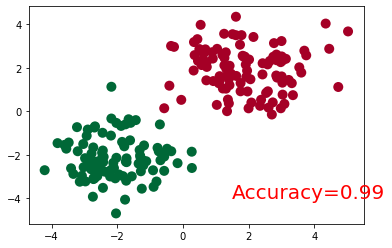

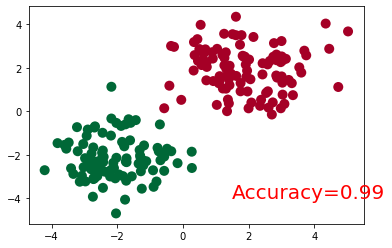

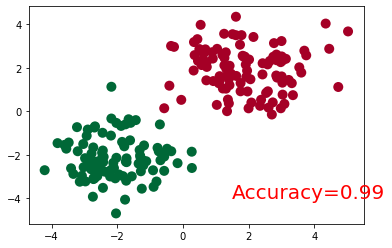

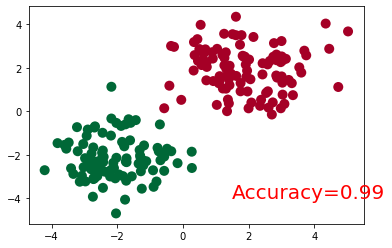

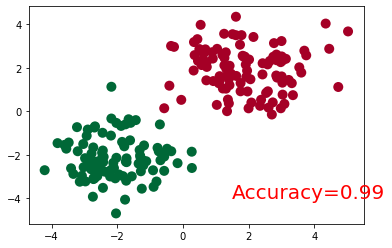

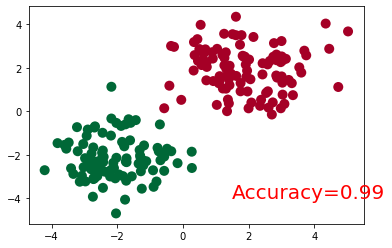

In [30]:
for i in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 4 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, s=100, lw=0, cmap="RdYlGn")
        accuracy = float((pred_y==target_y).astype(int).sum())/float(target_y.size)
        plt.text(1.5, -4, "Accuracy=%.2f" % accuracy, fontdict={"size": 20, "color": "red"})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [32]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
)

In [35]:
print(net2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


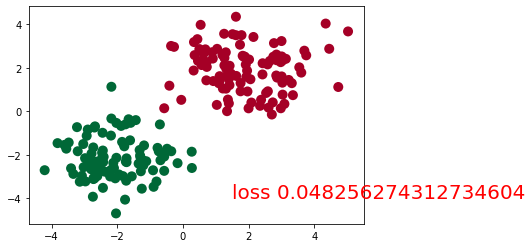

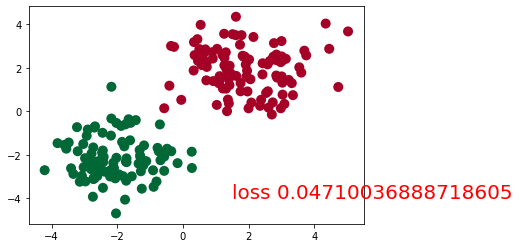

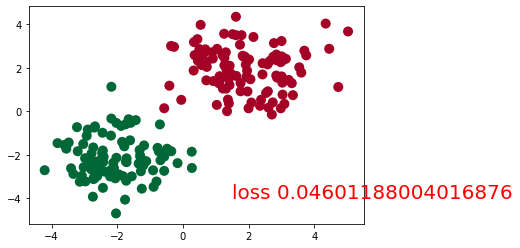

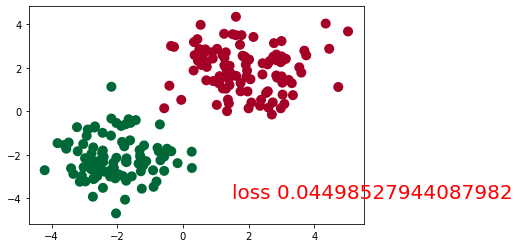

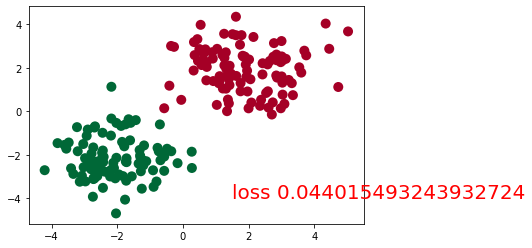

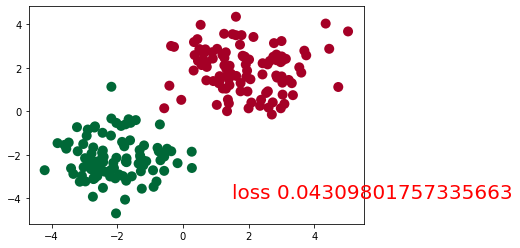

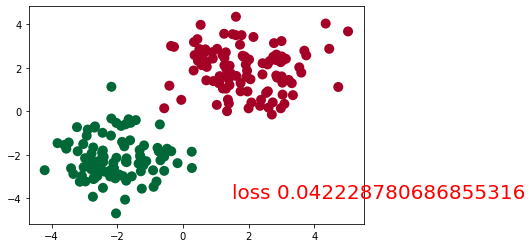

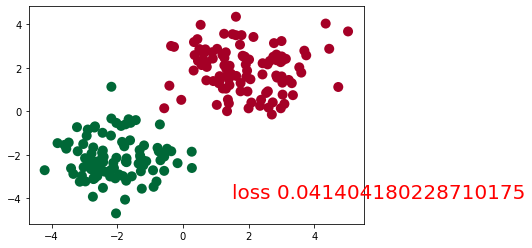

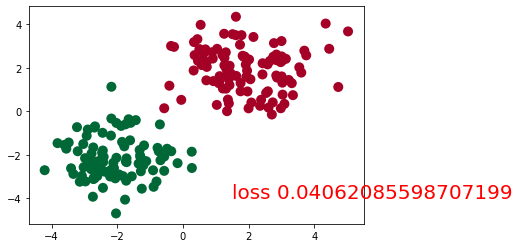

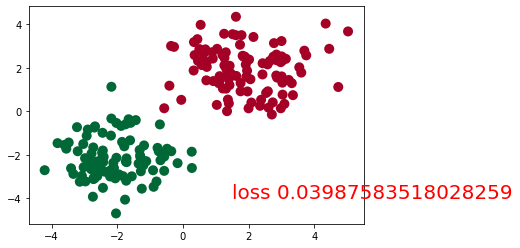

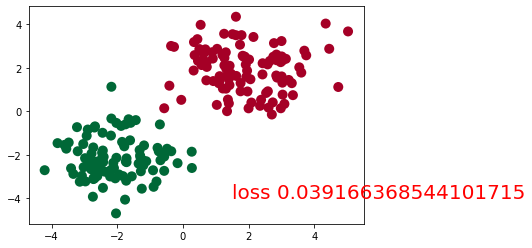

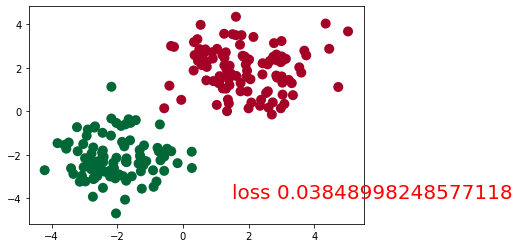

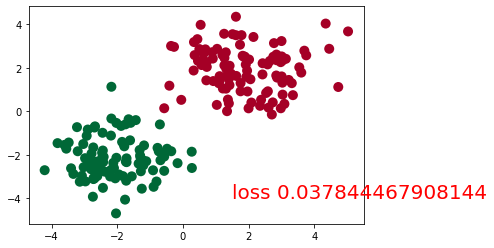

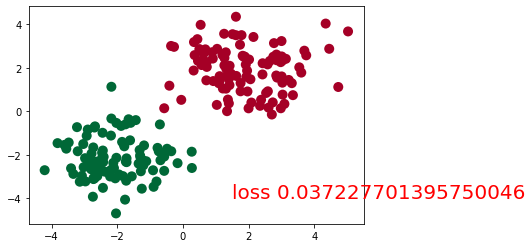

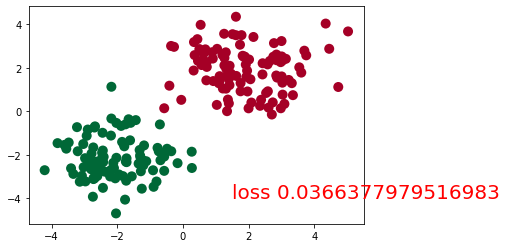

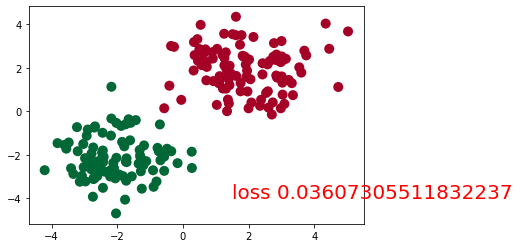

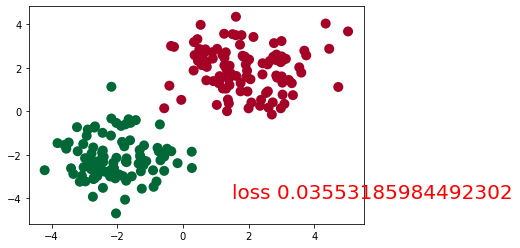

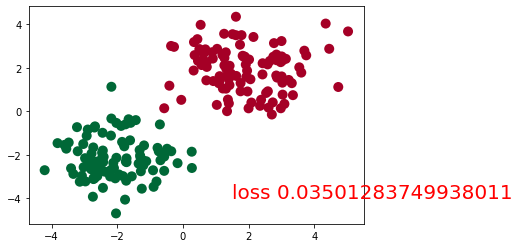

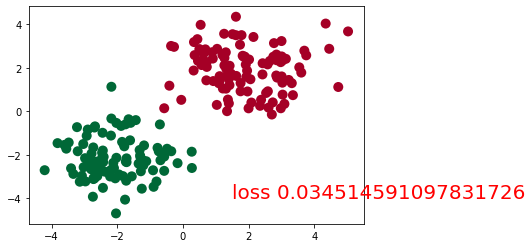

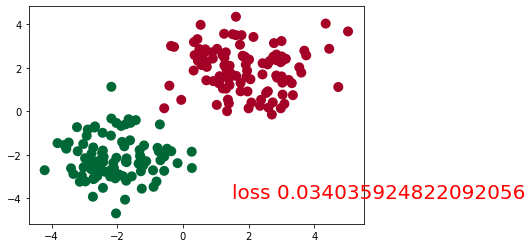

In [44]:
optimizer = torch.optim.SGD(net2.parameters(), lr=0.02)
for i in range(100):
    out = net2(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 5 == 0:
        plt.cla()
        predicton = torch.max(out, 1)
        pred_y = prediction.data.numpy()
        
        target_y = y.data.numpy()
        
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, s=100, lw=0, cmap="RdYlGn")
        plt.text(1.5, -4, "loss {}".format(loss.data.numpy()), fontdict={"color": "red", "size": 20})
        plt.pause(0.1)

plt.ioff()
plt.show()
        
    
        
    

In [42]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen